<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Carregando-dados" data-toc-modified-id="Carregando-dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Carregando dados</a></span></li><li><span><a href="#Cwlm-e-DH-por-aditivo" data-toc-modified-id="Cwlm-e-DH-por-aditivo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cwlm e DH por aditivo</a></span></li><li><span><a href="#Cwlm-e-Dwlm-por-concentração-de-aditivo" data-toc-modified-id="Cwlm-e-Dwlm-por-concentração-de-aditivo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cwlm e Dwlm por concentração de aditivo</a></span></li><li><span><a href="#Cwlm-e-Dwlm-por-índice-de-refração" data-toc-modified-id="Cwlm-e-Dwlm-por-índice-de-refração-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cwlm e Dwlm por índice de refração</a></span></li><li><span><a href="#Cwlm-e-DHwlm-por-cte-dieletrica" data-toc-modified-id="Cwlm-e-DHwlm-por-cte-dieletrica-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cwlm e DHwlm por cte dieletrica</a></span></li><li><span><a href="#Cwlm-e-DHwlm-por-param-Gordon" data-toc-modified-id="Cwlm-e-DHwlm-por-param-Gordon-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Cwlm e DHwlm por param Gordon</a></span></li><li><span><a href="#Cwlm-por-DHwlm" data-toc-modified-id="Cwlm-por-DHwlm-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Cwlm por DHwlm</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
mpl.rcParams.update({'mathtext.fontset':'dejavusans'})
mpl.rcParams['axes.formatter.use_locale'] = True

#Cores = {'Água':'k', 'Glicerina':'r', 'Sacarose':'b', 'Ureia':'g', '1,3BD':'magenta', 'DMSO':'purple'}
Cores = {'Água':'k', 'Glicerina':'#e67300', 'Sacarose':'#00b300', 
         'Ureia':'#ff0000', '1,3BD':'#0000ff', 'DMSO':'#bf00ff'}
Simbolos = {'Água':'s', 'Glicerina':'o', 'Sacarose':'<', 'Ureia':'>', '1,3BD':'v', 'DMSO':'^'}
def_markersize = 10
img_path = r'../../itc/'

# Carregando dados

In [2]:
dados = pd.read_excel('cwlm e DH.xlsx').reset_index(drop=True)

# Cwlm e DH por aditivo

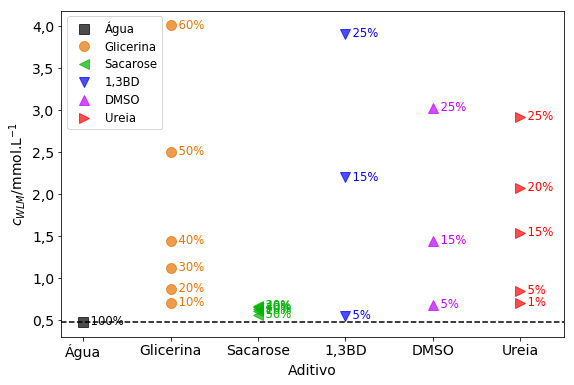

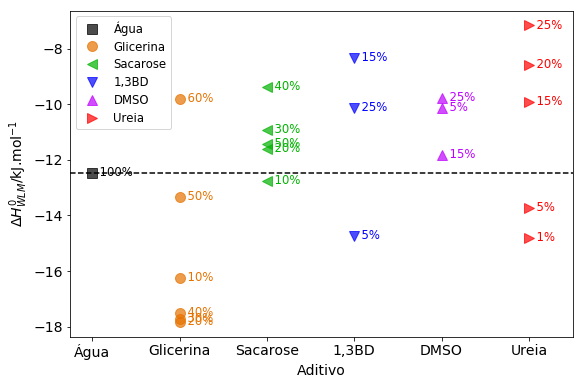

In [9]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Aditivo'].unique():
    ax1.plot(dados[dados['Aditivo'] == comp]['Aditivo'], dados[dados['Aditivo'] == comp]['cwlm'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)   
    ax2.plot(dados[dados['Aditivo'] == comp]['Aditivo'], dados[dados['Aditivo'] == comp]['DHwlm'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)

    
ax1.legend(fontsize='small')
ax1.set_xlabel('Aditivo')
ax1.set_ylabel(r'$c_{WLM}$/mmol.L$^{-1}$')
ax1.axhline(y=dados.iloc[0]['cwlm'], color='k', linestyle='--')
ax1.set_xlim(-0.252, 5.5)

for i, conc in enumerate(dados['cwlm']):
    c = f"{dados['% massa'].iloc[i]}"
    if c == "0":
        c = "100"
    ax1.text(dados['Aditivo'].iloc[i], conc, f"  {c}%", 
             color=Cores[dados['Aditivo'].iloc[i]],
            fontsize='small', ha='left', va='center')

ax2.legend(fontsize='small')
ax2.set_xlabel('Aditivo')
ax2.set_ylabel(r'$\Delta H^0_{WLM}$/kJ.mol$^{-1}$')
ax2.axhline(y=dados.iloc[0]['DHwlm'], color='k', linestyle='--')
ax2.set_xlim(-0.252, 5.5)

for i, DH in enumerate(dados['DHwlm']):
    c = f"{dados['% massa'].iloc[i]}"
    if c == "0":
        c = "100"
    ax2.text(dados['Aditivo'].iloc[i], DH, f"  {c}%", 
             color=Cores[dados['Aditivo'].iloc[i]],
            fontsize='small', ha='left', va='center')

fig1.savefig(img_path + 'Cwlm_por_Aditivo.pdf')
fig2.savefig(img_path + 'DHwlm_por_Aditivo.pdf')

# Cwlm e Dwlm por concentração de aditivo

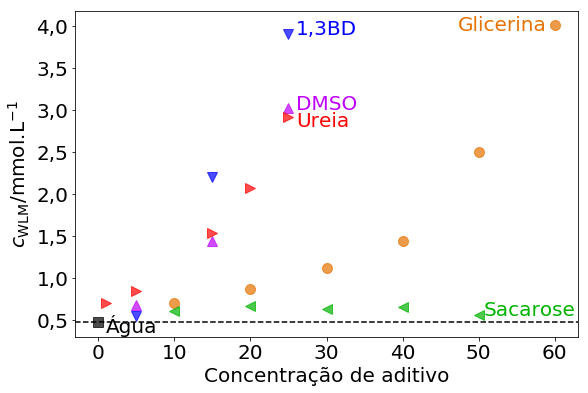

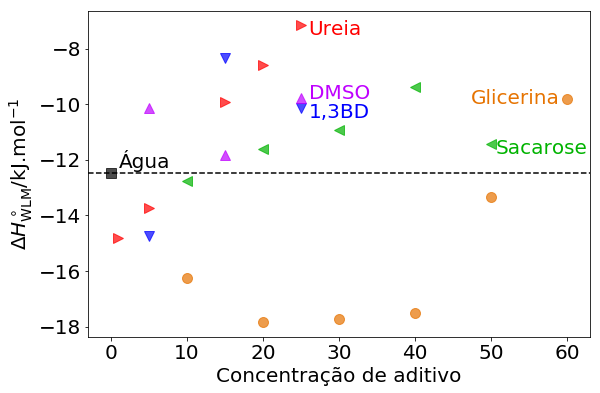

In [12]:
mpl.rcParams.update({'font.size': 20, 'text.usetex':False})

fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Aditivo'].unique():
    ax1.plot(dados[dados['Aditivo'] == comp]['% massa'], dados[dados['Aditivo'] == comp]['cwlm'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)   
    ax2.plot(dados[dados['Aditivo'] == comp]['% massa'], dados[dados['Aditivo'] == comp]['DHwlm'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)

    
#ax1.legend(fontsize='small')
ax1.set_xlabel('Concentração de aditivo')
ax1.set_ylabel(r'$c_\mathrm{WLM}$/mmol.L$^{-1}$')
ax1.axhline(y=dados.iloc[0]['cwlm'], color='k', linestyle='--')


#ax2.legend(fontsize='small')
ax2.set_xlabel('Concentração de aditivo')
ax2.set_ylabel(r'$\Delta H^\circ_\mathrm{WLM}$/kJ.mol$^{-1}$')
ax2.axhline(y=dados.iloc[0]['DHwlm'], color='k', linestyle='--')

ax1.text(59, 3.95, 'Glicerina', color=Cores['Glicerina'], ha='right')
ax1.text(50.6, 0.55, 'Sacarose', color=Cores['Sacarose'])
ax1.text(26, 3.9, '1,3BD', color=Cores['1,3BD'])
ax1.text(26, 3, 'DMSO', color=Cores['DMSO'])
ax1.text(26, 2.8, 'Ureia', color=Cores['Ureia'])
ax1.text(1, .35, 'Água', color=Cores['Água'])

ax2.text(59, -10, 'Glicerina', color=Cores['Glicerina'], ha='right')
ax2.text(50.6, -11.8, 'Sacarose', color=Cores['Sacarose'])
ax2.text(26, -10.5, '1,3BD', color=Cores['1,3BD'])
ax2.text(26, -9.8, 'DMSO', color=Cores['DMSO'])
ax2.text(26, -7.5, 'Ureia', color=Cores['Ureia'])
ax2.text(1, -12.3, 'Água', color=Cores['Água'])

fig1.savefig(img_path + 'Cwlm_por_conc.pdf')
fig2.savefig(img_path + 'DHwlm_por_conc.pdf')

mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

# Cwlm e Dwlm por índice de refração

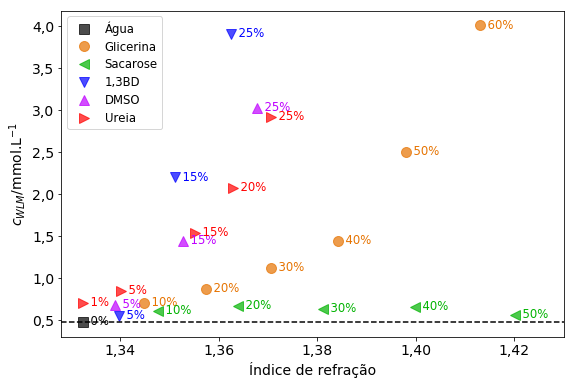

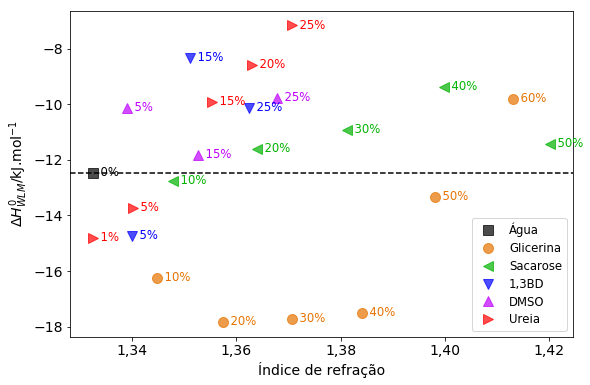

In [11]:
fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Aditivo'].unique():
    ax1.plot(dados[dados['Aditivo'] == comp]['n'], dados[dados['Aditivo'] == comp]['cwlm'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)   
    ax2.plot(dados[dados['Aditivo'] == comp]['n'], dados[dados['Aditivo'] == comp]['DHwlm'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)

    
ax1.legend(fontsize='small')
ax1.set_xlabel('Índice de refração')
ax1.set_ylabel(r'$c_{WLM}$/mmol.L$^{-1}$')
ax1.axhline(y=dados.iloc[0]['cwlm'], color='k', linestyle='--')
#ax1.set_xlim(-0.252, 5.5)

for i, conc in enumerate(dados['cwlm']):
    c = f"{dados['% massa'].iloc[i]}"
#     if c == "0":
#         c = "100"
    ax1.text(dados['n'].iloc[i], conc, f"  {c}%", 
             color=Cores[dados['Aditivo'].iloc[i]],
            fontsize='small', ha='left', va='center')

ax2.legend(fontsize='small')
ax2.set_xlabel('Índice de refração')
ax2.set_ylabel(r'$\Delta H^0_{WLM}$/kJ.mol$^{-1}$')
ax2.axhline(y=dados.iloc[0]['DHwlm'], color='k', linestyle='--')
#ax2.set_xlim(-0.252, 5.5)

for i, DH in enumerate(dados['DHwlm']):
    c = f"{dados['% massa'].iloc[i]}"
#     if c == "0":
#         c = "100"
    ax2.text(dados['n'].iloc[i], DH, f"  {c}%", 
             color=Cores[dados['Aditivo'].iloc[i]],
            fontsize='small', ha='left', va='center')

ax1.set_xlim(right=1.43)

fig1.savefig(img_path + 'Cwlm_por_n.pdf')
fig2.savefig(img_path + 'DHwlm_por_n.pdf')

# Cwlm e DHwlm por cte dieletrica

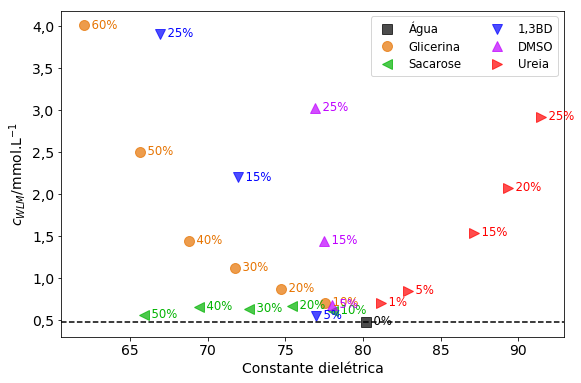

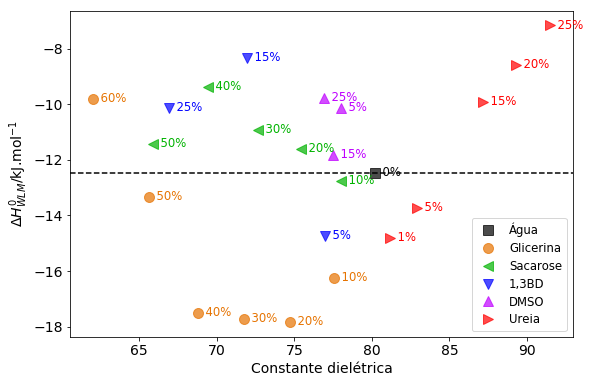

In [12]:
fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Aditivo'].unique():
    ax1.plot(dados[dados['Aditivo'] == comp]['eps'], dados[dados['Aditivo'] == comp]['cwlm'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)   
    ax2.plot(dados[dados['Aditivo'] == comp]['eps'], dados[dados['Aditivo'] == comp]['DHwlm'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)

    
ax1.legend(fontsize='small', ncol=2)
ax1.set_xlabel('Constante dielétrica')
ax1.set_ylabel(r'$c_{WLM}$/mmol.L$^{-1}$')
ax1.axhline(y=dados.iloc[0]['cwlm'], color='k', linestyle='--')
#ax1.set_xlim(-0.252, 5.5)

for i, conc in enumerate(dados['cwlm']):
    c = f"{dados['% massa'].iloc[i]}"
#     if c == "0":
#         c = "100"
    ax1.text(dados['eps'].iloc[i], conc, f"  {c}%", 
             color=Cores[dados['Aditivo'].iloc[i]],
            fontsize='small', ha='left', va='center')

ax2.legend(fontsize='small')
ax2.set_xlabel('Constante dielétrica')
ax2.set_ylabel(r'$\Delta H^0_{WLM}$/kJ.mol$^{-1}$')
ax2.axhline(y=dados.iloc[0]['DHwlm'], color='k', linestyle='--')
#ax2.set_xlim(-0.252, 5.5)

for i, DH in enumerate(dados['DHwlm']):
    c = f"{dados['% massa'].iloc[i]}"
#     if c == "0":
#         c = "100"
    ax2.text(dados['eps'].iloc[i], DH, f"  {c}%", 
             color=Cores[dados['Aditivo'].iloc[i]],
            fontsize='small', ha='left', va='center')

fig1.savefig(img_path + 'Cwlm_por_eps.pdf')
fig2.savefig(img_path + 'DHwlm_por_eps.pdf')

# Cwlm e DHwlm por param Gordon

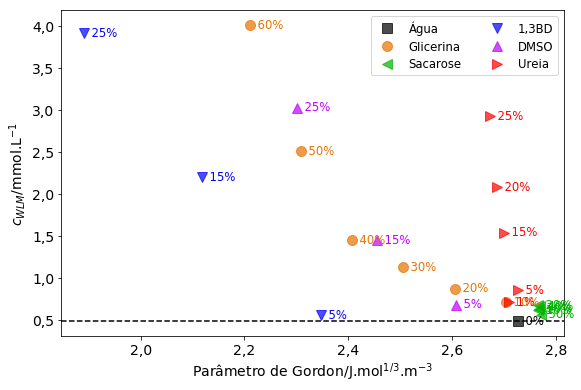

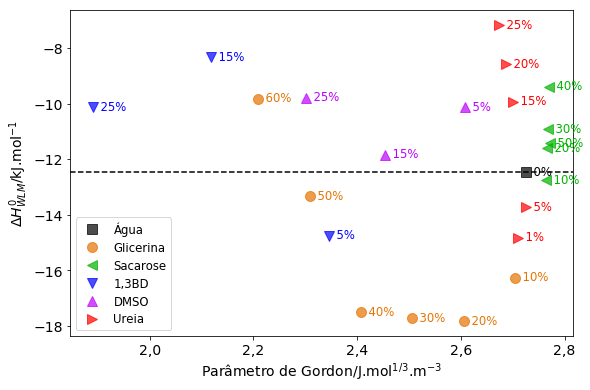

In [15]:
fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Aditivo'].unique():
    ax1.plot(dados[dados['Aditivo'] == comp]['G'], dados[dados['Aditivo'] == comp]['cwlm'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)   
    ax2.plot(dados[dados['Aditivo'] == comp]['G'], dados[dados['Aditivo'] == comp]['DHwlm'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)

    
ax1.legend(fontsize='small', ncol=2)
ax1.set_xlabel(r'Parâmetro de Gordon/J.mol$^{1/3}$.m$^{-3}$')
ax1.set_ylabel(r'$c_{WLM}$/mmol.L$^{-1}$')
ax1.axhline(y=dados.iloc[0]['cwlm'], color='k', linestyle='--')
#ax1.set_xlim(-0.252, 5.5)

for i, conc in enumerate(dados['cwlm']):
    c = f"{dados['% massa'].iloc[i]}"
#     if c == "0":
#         c = "100"
    ax1.text(dados['G'].iloc[i], conc, f"  {c}%", 
             color=Cores[dados['Aditivo'].iloc[i]],
            fontsize='small', ha='left', va='center')

ax2.legend(fontsize='small')
ax2.set_xlabel(r'Parâmetro de Gordon/J.mol$^{1/3}$.m$^{-3}$')
ax2.set_ylabel(r'$\Delta H^0_{WLM}$/kJ.mol$^{-1}$')
ax2.axhline(y=dados.iloc[0]['DHwlm'], color='k', linestyle='--')
#ax2.set_xlim(-0.252, 5.5)

for i, DH in enumerate(dados['DHwlm']):
    c = f"{dados['% massa'].iloc[i]}"
#     if c == "0":
#         c = "100"
    ax2.text(dados['G'].iloc[i], DH, f"  {c}%", 
             color=Cores[dados['Aditivo'].iloc[i]],
            fontsize='small', ha='left', va='center')

fig1.savefig(img_path + 'Cwlm_por_G.pdf')
fig2.savefig(img_path + 'DHwlm_por_G.pdf')

# Cwlm por DHwlm

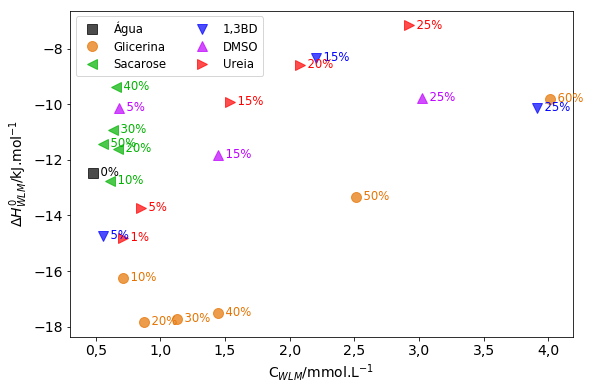

In [14]:
fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Aditivo'].unique():
    ax1.plot(dados[dados['Aditivo'] == comp]['cwlm'], dados[dados['Aditivo'] == comp]['DHwlm'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)   

    
ax1.legend(fontsize='small', ncol=2)
ax1.set_xlabel(r'C$_{WLM}$/mmol.L$^{-1}$')
ax1.set_ylabel(r'$\Delta H^0_{WLM}$/kJ.mol$^{-1}$')

for i, conc in enumerate(dados['cwlm']):
    c = f"{dados['% massa'].iloc[i]}"
#     if c == "0":
#         c = "100"
    ax1.text(dados['cwlm'].iloc[i], dados['DHwlm'].iloc[i], f"  {c}%", 
             color=Cores[dados['Aditivo'].iloc[i]],
            fontsize='small', ha='left', va='center')


fig1.savefig(img_path + 'Cwlm_por_DHwlm.pdf')